In [1]:
import pandas as pd
import pickle 
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Clean result

In [2]:
%%time
with open("data_full.pkl", 'rb') as f:
    df = pickle.load(f)

CPU times: user 1min 38s, sys: 9.91 s, total: 1min 48s
Wall time: 1min 57s


In [3]:
df.head()

,url,date,title,text,main_text,relevant,Tokens,cleaned_tokens,ktrain_topic,vader_score,vader_sentiment,svm_sentiment,vader_score2,textblob_sent,vader_sentiment2,NER,NER_sent,bert_sentiment
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,"Photo taken on July 1, 2019, shows a sign for ...",1,"[Photo, taken, on, July, 1, ,, 2019, ,, shows,...","[Photo, taken, July, show, sign, electronic, t...",5,0.9954,Positive,1,0.9946,Positive,Positive,Ent...,Ent...,positive
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,Children With Autism Saw Their Learning and So...,1,"[Children, With, Autism, Saw, Their, Learning,...","[Children, With, Autism, Saw, Their, Learning,...",5,0.9980,Positive,0,0.9981,Positive,Positive,E...,E...,positive
2,http://www.dataweek.co.za/12835r,2021-03-26,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...","Forget ML, AI and Industry 4.0 – obsolescence ...",1,"[Forget, ML, ,, AI, and, Industry, 4.0, –, obs...","[Forget, ML, AI, Industry, obsolescence, focus...",5,0.9967,Positive,0,0.9975,Positive,Positive,Entities Labels 0 Forget...,Entities Labels Score Sentiment...,neutral
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,Strategy Analytics: 71% of Smartphones Sold Gl...,1,"[Strategy, Analytics, :, 71, %, of, Smartphone...","[Strategy, Analytics, Smartphones, Sold, Globa...",0,0.9988,Positive,1,0.9988,Positive,Positive,E...,E...,positive
4,http://www.itbusinessnet.com/2020/10/olympus-t...,2020-10-20,Olympus to Support Endoscopic AI Diagnosis Edu...,\n\nOlympus to Support Endoscopic AI Diagnosis...,Olympus to Support Endoscopic AI Diagnosis Edu...,1,"[Olympus, to, Support, Endoscopic, AI, Diagnos...","[Olympus, Support, Endoscopic, AI, Diagnosis, ...",7,0.9923,Positive,0,0.9943,Positive,Positive,E...,E...,neutral


In [4]:
df.shape

(127739, 18)

In [5]:
df['website'] = df['url'].apply(lambda x: x.split('/')[2])
df.head()

,url,date,title,text,main_text,relevant,Tokens,cleaned_tokens,ktrain_topic,vader_score,vader_sentiment,svm_sentiment,vader_score2,textblob_sent,vader_sentiment2,NER,NER_sent,bert_sentiment,website
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,"Photo taken on July 1, 2019, shows a sign for ...",1,"[Photo, taken, on, July, 1, ,, 2019, ,, shows,...","[Photo, taken, July, show, sign, electronic, t...",5,0.9954,Positive,1,0.9946,Positive,Positive,Ent...,Ent...,positive,en.people.cn
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,Children With Autism Saw Their Learning and So...,1,"[Children, With, Autism, Saw, Their, Learning,...","[Children, With, Autism, Saw, Their, Learning,...",5,0.9980,Positive,0,0.9981,Positive,Positive,E...,E...,positive,newsparliament.com
2,http://www.dataweek.co.za/12835r,2021-03-26,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...","Forget ML, AI and Industry 4.0 – obsolescence ...",1,"[Forget, ML, ,, AI, and, Industry, 4.0, –, obs...","[Forget, ML, AI, Industry, obsolescence, focus...",5,0.9967,Positive,0,0.9975,Positive,Positive,Entities Labels 0 Forget...,Entities Labels Score Sentiment...,neutral,www.dataweek.co.za
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,Strategy Analytics: 71% of Smartphones Sold Gl...,1,"[Strategy, Analytics, :, 71, %, of, Smartphone...","[Strategy, Analytics, Smartphones, Sold, Globa...",0,0.9988,Positive,1,0.9988,Positive,Positive,E...,E...,positive,www.homeoffice.consumerelectronicsnet.com
4,http://www.itbusinessnet.com/2020/10/olympus-t...,2020-10-20,Olympus to Support Endoscopic AI Diagnosis Edu...,\n\nOlympus to Support Endoscopic AI Diagnosis...,Olympus to Support Endoscopic AI Diagnosis Edu...,1,"[Olympus, to, Support, Endoscopic, AI, Diagnos...","[Olympus, Support, Endoscopic, AI, Diagnosis, ...",7,0.9923,Positive,0,0.9943,Positive,Positive,E...,E...,neutral,www.itbusinessnet.com


In [ ]:
df.drop(columns = ['url', 'title', 'text', 'relevant', 'Tokens', 'vader_score', 'vader_sentiment', 'svm_sentiment', 'textblob_sent', 'NER'], inplace = True)

In [6]:
df.head()

,url,date,title,text,main_text,relevant,Tokens,cleaned_tokens,ktrain_topic,vader_score,vader_sentiment,svm_sentiment,vader_score2,textblob_sent,vader_sentiment2,NER,NER_sent,bert_sentiment,website
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,"Photo taken on July 1, 2019, shows a sign for ...",1,"[Photo, taken, on, July, 1, ,, 2019, ,, shows,...","[Photo, taken, July, show, sign, electronic, t...",5,0.9954,Positive,1,0.9946,Positive,Positive,Ent...,Ent...,positive,en.people.cn
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,Children With Autism Saw Their Learning and So...,1,"[Children, With, Autism, Saw, Their, Learning,...","[Children, With, Autism, Saw, Their, Learning,...",5,0.9980,Positive,0,0.9981,Positive,Positive,E...,E...,positive,newsparliament.com
2,http://www.dataweek.co.za/12835r,2021-03-26,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...","Forget ML, AI and Industry 4.0 – obsolescence ...",1,"[Forget, ML, ,, AI, and, Industry, 4.0, –, obs...","[Forget, ML, AI, Industry, obsolescence, focus...",5,0.9967,Positive,0,0.9975,Positive,Positive,Entities Labels 0 Forget...,Entities Labels Score Sentiment...,neutral,www.dataweek.co.za
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,Strategy Analytics: 71% of Smartphones Sold Gl...,1,"[Strategy, Analytics, :, 71, %, of, Smartphone...","[Strategy, Analytics, Smartphones, Sold, Globa...",0,0.9988,Positive,1,0.9988,Positive,Positive,E...,E...,positive,www.homeoffice.consumerelectronicsnet.com
4,http://www.itbusinessnet.com/2020/10/olympus-t...,2020-10-20,Olympus to Support Endoscopic AI Diagnosis Edu...,\n\nOlympus to Support Endoscopic AI Diagnosis...,Olympus to Support Endoscopic AI Diagnosis Edu...,1,"[Olympus, to, Support, Endoscopic, AI, Diagnos...","[Olympus, Support, Endoscopic, AI, Diagnosis, ...",7,0.9923,Positive,0,0.9943,Positive,Positive,E...,E...,neutral,www.itbusinessnet.com


In [ ]:
%%time
with open("cleaned_res.pkl", 'wb') as f:
    pickle.dump(df, f)

CPU times: user 22.6 s, sys: 1.33 s, total: 23.9 s
Wall time: 23.9 s


## Topic Modeling

In [13]:
%%time
with open("cleaned_res.pkl", 'rb') as f:
    df = pickle.load(f)

CPU times: user 41.3 s, sys: 1.94 s, total: 43.3 s
Wall time: 46.4 s


In [14]:
industry = pd.read_csv('industry_info.csv')

In [15]:
df.head(2)

,date,main_text,cleaned_tokens,ktrain_topic,vader_score2,vader_sentiment2,NER_sent,bert_sentiment,website
0,2021-03-18,"Photo taken on July 1, 2019, shows a sign for ...","[Photo, taken, July, show, sign, electronic, t...",5,0.9946,Positive,Ent...,positive,en.people.cn
1,2020-02-27,Children With Autism Saw Their Learning and So...,"[Children, With, Autism, Saw, Their, Learning,...",5,0.9981,Positive,E...,positive,newsparliament.com


In [16]:
df['Industry'] = industry['Industry'].copy()

In [17]:
df['Industry'].value_counts()

Others                96240
Healthcare&Biotech     7432
Automotive             4758
Finance                4179
Technology             3191
Military & Defense     3124
Telecommunication      2474
Publishing             2324
Education              2300
Media Creation         1070
Agriculture             647
Name: Industry, dtype: int64

## Sentiment Analysis

In [14]:
df.head(2)

,date,main_text,cleaned_tokens,ktrain_topic,vader_score2,vader_sentiment2,NER_sent,bert_sentiment,website,Industry
0,2021-03-18,"Photo taken on July 1, 2019, shows a sign for ...","[Photo, taken, July, show, sign, electronic, t...",5,0.9946,Positive,Ent...,positive,en.people.cn,Automotive
1,2020-02-27,Children With Autism Saw Their Learning and So...,"[Children, With, Autism, Saw, Their, Learning,...",5,0.9981,Positive,E...,positive,newsparliament.com,Others


### Date level

In [15]:
df_time_sent = pd.DataFrame(df.groupby(['date','bert_sentiment'])['bert_sentiment'].count())
df_time_sent.head()

bert_sentiment
date       bert_sentiment                
2020-01-01 neutral                     15
           positive                    13
2020-01-02 negative                     1
           neutral                     46
           positive                    67

In [16]:
df_time_sent.reset_index('date',inplace=True)
df_time_sent.rename(columns = {'bert_sentiment':'count'}, inplace = True)

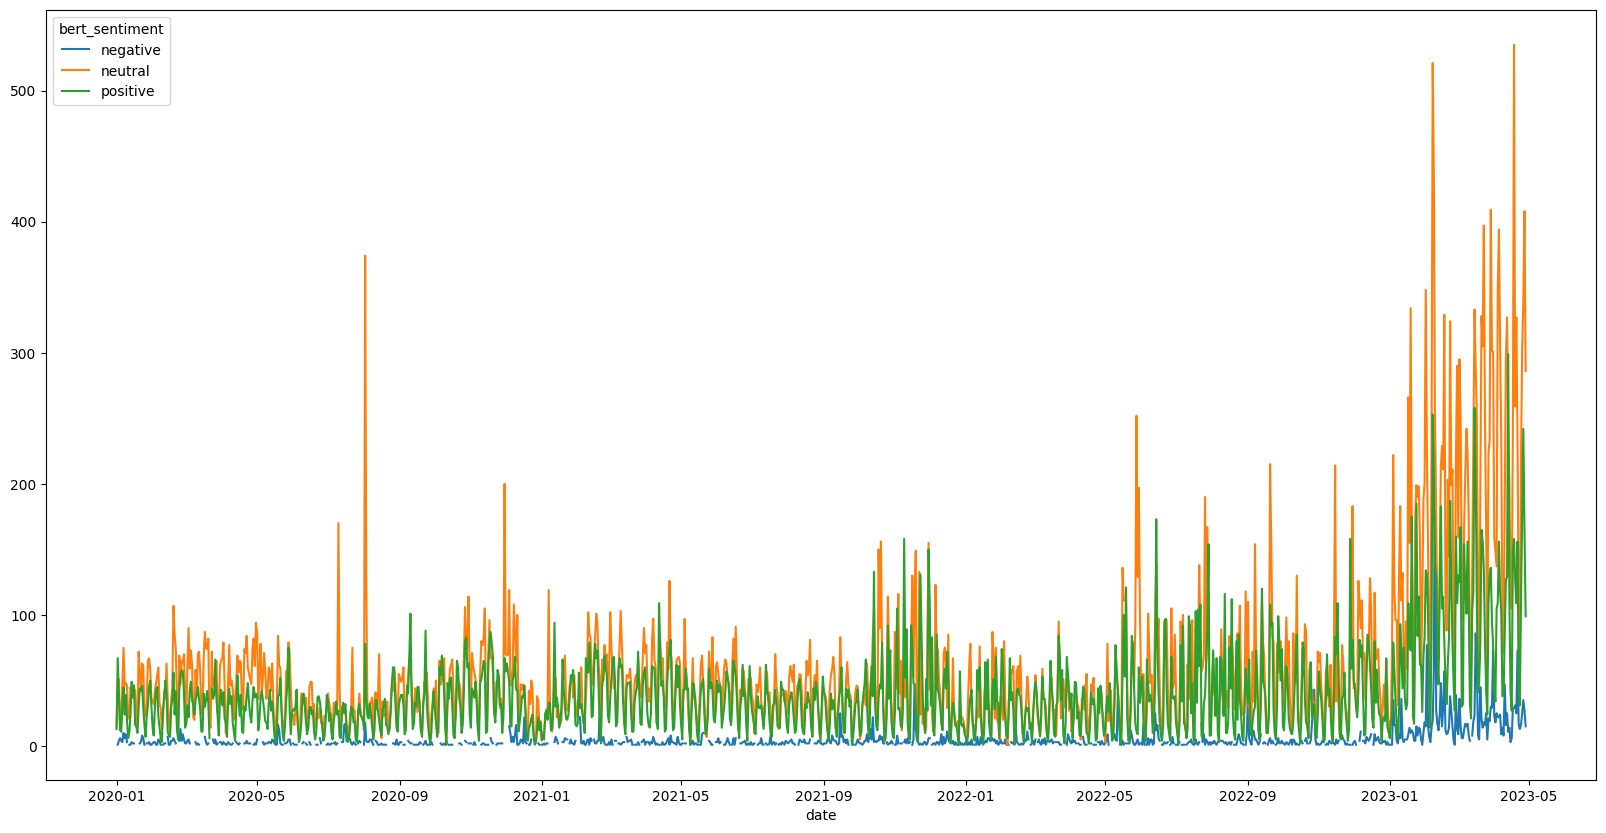

In [17]:
pd.pivot_table(df_time_sent.reset_index(),
               index='date', columns='bert_sentiment', values='count'
              ).plot(subplots=False,figsize=(20, 10))
plt.show()

### Month level

In [18]:
df['yr_month'] = df['date'].apply(lambda x: x.strftime("%Y-%m"))

In [19]:
df_monthly_sent = pd.DataFrame(df.groupby(['yr_month','bert_sentiment'])['bert_sentiment'].count())
df_monthly_sent.reset_index('yr_month',inplace=True)
df_monthly_sent.rename(columns = {'bert_sentiment':'count'}, inplace = True)

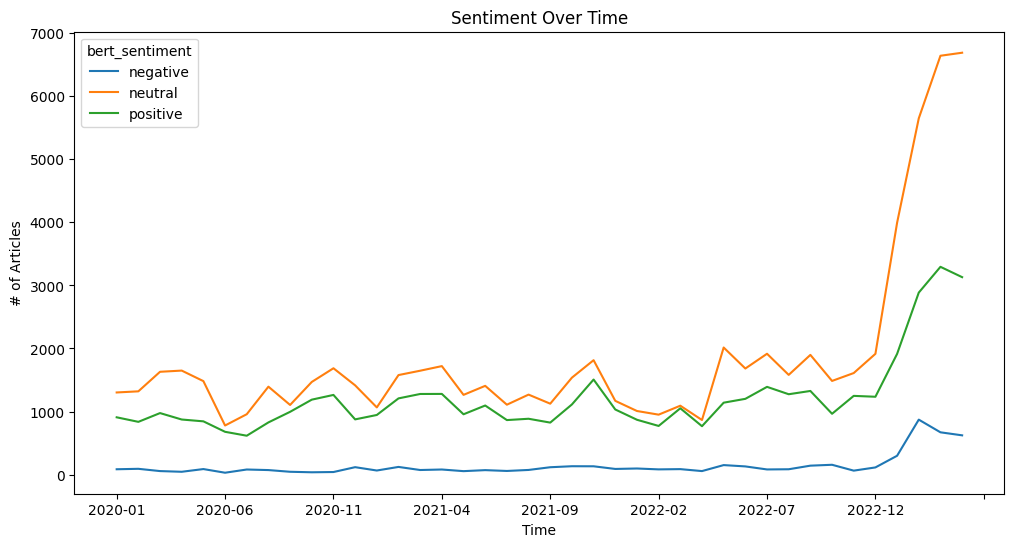

In [20]:
pd.pivot_table(df_monthly_sent.reset_index(),
               index = 'yr_month', columns = 'bert_sentiment', values = 'count'
              ).plot(subplots = False,figsize = (12, 6))
plt.title("Sentiment Over Time")
plt.ylabel("# of Articles")
plt.xlabel("Time")
plt.show()

### Industry Level

In [29]:
df['Industry'].value_counts()

Others                96240
Healthcare&Biotech     7432
Automotive             4758
Finance                4179
Technology             3191
Military & Defense     3124
Telecommunication      2474
Publishing             2324
Education              2300
Media Creation         1070
Agriculture             647
Name: Industry, dtype: int64

In [8]:
test = df.copy()
test['Positive'] = test['bert_sentiment'].apply(lambda x: x == 'positive')
test['Negative'] = test['bert_sentiment'].apply(lambda x: x == 'negative')
test_grouped = test.groupby('Industry').agg(
    average_sentiment=('vader_score2', 'mean'),
    count = ('vader_score2', 'count'),
    positive_count=('Positive', 'sum'),
    negative_count=('Negative', 'sum'),
    ).reset_index()

test_grouped['pos_rate'] = test_grouped['positive_count']/test_grouped['count']
test_grouped['neg_rate'] = test_grouped['negative_count']/test_grouped['count']
test_grouped = test_grouped.sort_values(by = 'pos_rate', ascending=False)
test_grouped[['Industry', 'average_sentiment', 'pos_rate', 'neg_rate']]

,Industry,average_sentiment,pos_rate,neg_rate
4,Healthcare&Biotech,0.694068,0.558262,0.014263
0,Agriculture,0.900165,0.428130,0.015456
7,Others,0.771219,0.388248,0.039194
6,Military & Defense,0.638020,0.356274,0.108835
1,Automotive,0.774084,0.344052,0.034468
10,Telecommunication,0.745128,0.278901,0.056184
9,Technology,0.500261,0.277656,0.134127
2,Education,0.789510,0.252174,0.029130
5,Media Creation,0.748846,0.244860,0.019626
3,Finance,0.855573,0.223977,0.082795


In [22]:
def plot_industry_sent(industry):
    industry_df = df[df['Industry'] == industry]
    df_industry_sent = pd.DataFrame(industry_df.groupby(['yr_month','bert_sentiment'])['bert_sentiment'].count())
    all_combinations = pd.MultiIndex.from_product([df['yr_month'].unique(), df['bert_sentiment'].unique()], names=['yr_month', 'bert_sentiment'])
    df_industry_sent = df_industry_sent.reindex(all_combinations, fill_value=0)
    df_industry_sent.reset_index('yr_month',inplace=True)
    df_industry_sent.rename(columns = {'bert_sentiment':'count'}, inplace = True)


    pd.pivot_table(df_industry_sent.reset_index(),
                   index = 'yr_month', columns = 'bert_sentiment', values = 'count'
                  ).plot(subplots = False,figsize = (12, 6))
    plt.title(f"Sentiment Over Time for {industry}")
    plt.ylabel("# of Articles")
    plt.xlabel("Time")
    plt.show()

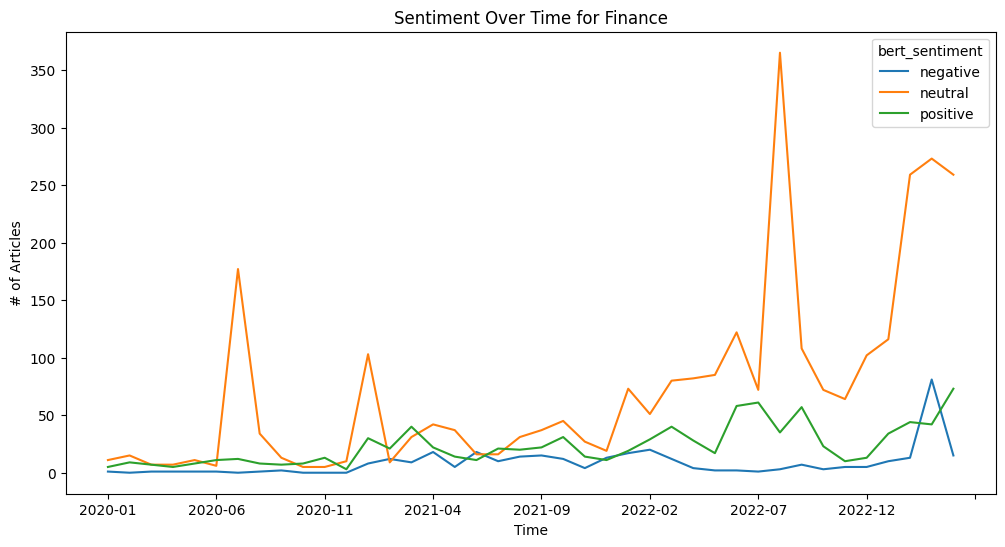

In [25]:
plot_industry_sent('Finance')

## Entity Identification

### Prep

In [55]:
df.head(2)

,date,main_text,cleaned_tokens,ktrain_topic,vader_score2,vader_sentiment2,NER_sent,bert_sentiment,website,Industry,yr_month
0,2021-03-18,"Photo taken on July 1, 2019, shows a sign for ...","[Photo, taken, July, show, sign, electronic, t...",5,0.9946,Positive,Ent...,positive,en.people.cn,Automotive,2021-03
1,2020-02-27,Children With Autism Saw Their Learning and So...,"[Children, With, Autism, Saw, Their, Learning,...",5,0.9981,Positive,E...,positive,newsparliament.com,Others,2020-02


In [56]:
%%time
for idx, row in df.iterrows():
    row['NER_sent']['date'] = row['date']
    row['NER_sent']['article_sent'] = row['bert_sentiment']
    row['NER_sent']['Industry'] = row['Industry']

CPU times: user 2min 23s, sys: 159 ms, total: 2min 23s
Wall time: 2min 23s


In [57]:
entity_analysis = pd.concat(df['NER_sent'].tolist())
entity_analysis.head()

,Entities,Labels,Score,Sentiment,date,article_sent,Industry
0,ETC,ORG,0.0000,Neutral,2021-03-18,positive,Automotive
1,Beijing,GPE,0.0000,Neutral,2021-03-18,positive,Automotive
2,ETC,ORG,0.0000,Neutral,2021-03-18,positive,Automotive
3,People’s Daily Online,ORG,0.9169,Positive,2021-03-18,positive,Automotive
4,Li Wenming,PERSON,0.9169,Positive,2021-03-18,positive,Automotive


### Analysis

#### All Articles

In [59]:
#!pip install wordcloud

In [60]:
from wordcloud import WordCloud

In [61]:
entity_analysis.head()

,Entities,Labels,Score,Sentiment,date,article_sent,Industry
0,ETC,ORG,0.0000,Neutral,2021-03-18,positive,Automotive
1,Beijing,GPE,0.0000,Neutral,2021-03-18,positive,Automotive
2,ETC,ORG,0.0000,Neutral,2021-03-18,positive,Automotive
3,People’s Daily Online,ORG,0.9169,Positive,2021-03-18,positive,Automotive
4,Li Wenming,PERSON,0.9169,Positive,2021-03-18,positive,Automotive


In [62]:
def identify_ner(label, sentiment, n):
    
    sample = entity_analysis[(entity_analysis.Sentiment == sentiment) & (entity_analysis.Labels == label)]
    res_df = sample.groupby('Entities').count().sort_values(by = 'Labels', ascending = False).reset_index()[['Entities', 'Labels']]
    res_df.columns = ['Entities', 'Count']
    return res_df.head(n)

In [63]:
def plot_wordcloud(label, sentiment):
    
    exclude = ['Artificial Intelligence', 'Web Service', 'Computer Vision', 'Data Analytics', 
                   'Social Media', 'AI', 'Intelligence AI', 'Machine Learning', 'Cyber Security',
                   'Data Science', 'Intelligence Market', 'OpenAI', 'COVID-19']
    sample =  entity_analysis[(~entity_analysis['Entities'].isin(exclude)) & (entity_analysis.article_sent == sentiment.lower())]
    sample = sample[(sample.Sentiment == sentiment) & (sample.Labels == label)]
    sample = sample.groupby('Entities').count().sort_values(by = 'Labels', ascending = False).reset_index()[['Entities', 'Labels']]
    word_counts = dict(zip(sample['Entities'].tolist(), sample['Labels'].tolist()))

    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_frequencies(word_counts)
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

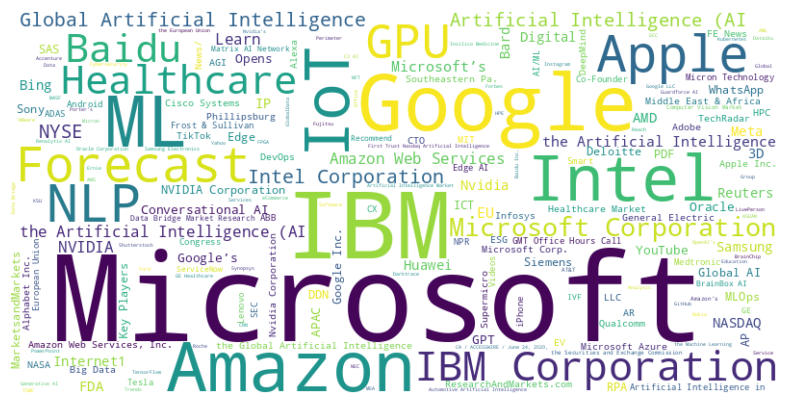

In [33]:
plot_wordcloud('ORG', 'Positive')

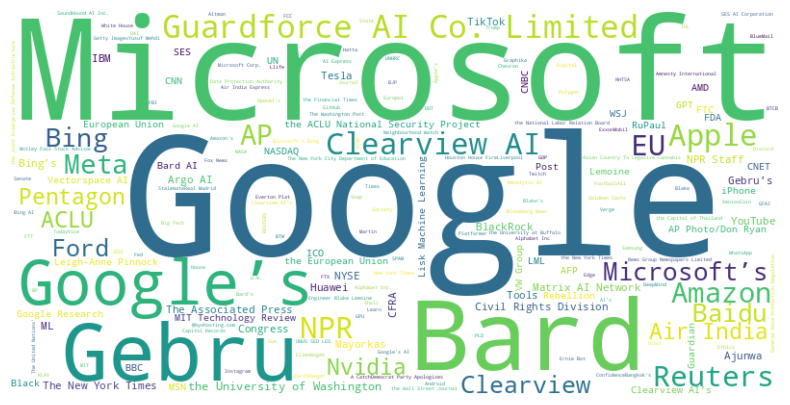

In [34]:
plot_wordcloud('ORG', 'Negative')

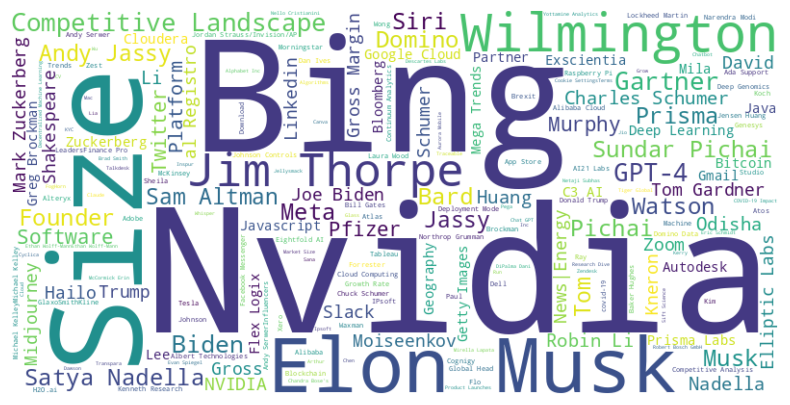

In [35]:
plot_wordcloud('PERSON', 'Positive')

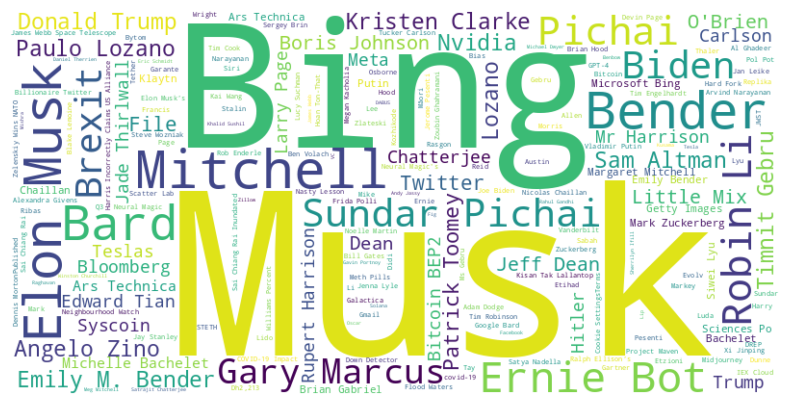

In [36]:
plot_wordcloud('PERSON', 'Negative')

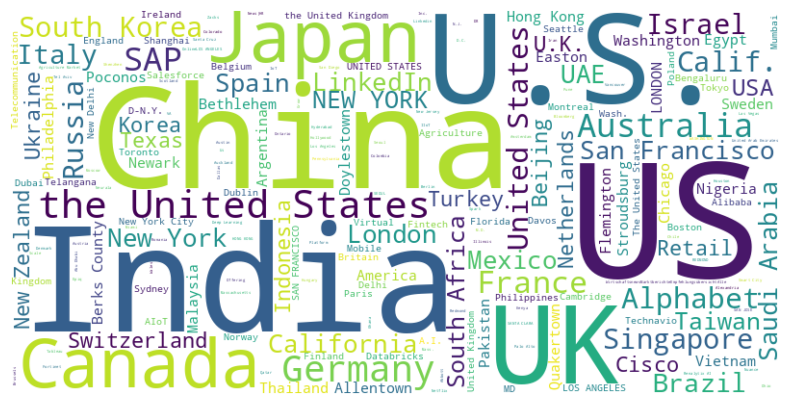

In [37]:
plot_wordcloud('GPE', 'Positive')

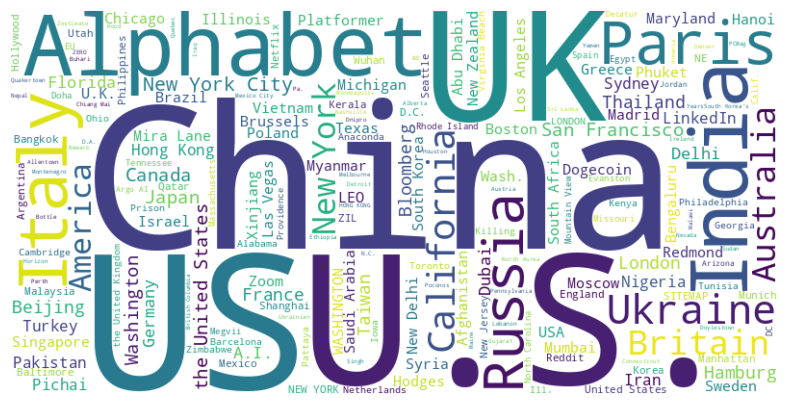

In [38]:
plot_wordcloud('GPE', 'Negative')

In [46]:
identify_ner('ORG', 'Positive', 10)

,Labels,Score,Sentiment,date,article_sent
Entities,,,,,
AI,370167,370167,370167,370167,370167
Microsoft,38225,38225,38225,38225,38225
Artificial Intelligence,34681,34681,34681,34681,34681
IBM,19658,19658,19658,19658,19658
Google,17931,17931,17931,17931,17931
Amazon,11438,11438,11438,11438,11438
Intel,9074,9074,9074,9074,9074
ML,8501,8501,8501,8501,8501
Apple,6844,6844,6844,6844,6844


In [47]:
identify_ner('ORG', 'Negative', 10)

,Labels,Score,Sentiment,date,article_sent
Entities,,,,,
AI,74481,74481,74481,74481,74481
Microsoft,7125,7125,7125,7125,7125
Google,5423,5423,5423,5423,5423
SPAM,2085,2085,2085,2085,2085
AP,1560,1560,1560,1560,1560
EU,1533,1533,1533,1533,1533
Bard,1523,1523,1523,1523,1523
Apple,1471,1471,1471,1471,1471
Amazon,1253,1253,1253,1253,1253


In [55]:
identify_ner('PERSON', 'Positive', 10)

,Labels,Score,Sentiment,date,article_sent
Entities,,,,,
OpenAI,7181,7181,7181,7181,7181
COVID-19,4469,4469,4469,4469,4469
Elon Musk,3486,3486,3486,3486,3486
Musk,3315,3315,3315,3315,3315
Nvidia,2947,2947,2947,2947,2947
Bing,2907,2907,2907,2907,2907
Size,2104,2104,2104,2104,2104
Biden,1878,1878,1878,1878,1878
Bard,1749,1749,1749,1749,1749


In [49]:
identify_ner('PERSON', 'Negative', 10)

,Labels,Score,Sentiment,date,article_sent
Entities,,,,,
Musk,2446,2446,2446,2446,2446
OpenAI,2176,2176,2176,2176,2176
COVID-19,1877,1877,1877,1877,1877
Elon Musk,1323,1323,1323,1323,1323
Biden,1021,1021,1021,1021,1021
Bing,1009,1009,1009,1009,1009
Donald Trump,931,931,931,931,931
Tu,640,640,640,640,640
Trump,548,548,548,548,548


In [50]:
identify_ner('GPE', 'Positive', 10)

,Labels,Score,Sentiment,date,article_sent
Entities,,,,,
US,28760,28760,28760,28760,28760
India,26487,26487,26487,26487,26487
OpenAI,23136,23136,23136,23136,23136
China,21158,21158,21158,21158,21158
U.S.,16969,16969,16969,16969,16969
UK,12029,12029,12029,12029,12029
Japan,9964,9964,9964,9964,9964
Canada,7700,7700,7700,7700,7700
Germany,6466,6466,6466,6466,6466


In [51]:
identify_ner('GPE', 'Negative', 10)

,Labels,Score,Sentiment,date,article_sent
Entities,,,,,
OpenAI,6032,6032,6032,6032,6032
US,5565,5565,5565,5565,5565
U.S.,5248,5248,5248,5248,5248
China,5130,5130,5130,5130,5130
India,4597,4597,4597,4597,4597
UK,2602,2602,2602,2602,2602
Ukraine,2492,2492,2492,2492,2492
Russia,2232,2232,2232,2232,2232
Italy,1488,1488,1488,1488,1488


In [61]:
identify_ner('PRODUCT', 'Positive', 30)

,Labels,Score,Sentiment,date,article_sent
Entities,,,,,
Twitter,3666,3666,3666,3666,3666
COVID-19,2708,2708,2708,2708,2708
Excel,1316,1316,1316,1316,1316
Discovery,1223,1223,1223,1223,1223
ForbesLife,1028,1028,1028,1028,1028
BrandVoice,711,711,711,711,711
Career,681,681,681,681,681
CampusBecome,611,611,611,611,611
DeepMind,583,583,583,583,583


#### Targeted sentiment by industry

In [37]:
def analyze_entity(df, label, mask_n, sortby, ascending, n):
    
    df['Positive'] = df['Sentiment'].apply(lambda x: x == 'Positive')
    df['Negative'] = df['Sentiment'].apply(lambda x: x == 'Negative')

    df_grouped = df.groupby(['Entities', 'Labels']).agg(
        total_sentiment=('Score', 'sum'),
        count=('Score', 'count'),
        average_sentiment=('Score', 'mean'),
        positive_count=('Positive', 'sum'),
        negative_count=('Negative', 'sum'),
    ).reset_index()

    df_grouped = df_grouped[df_grouped['Labels'] == label]
    df_grouped = df_grouped[df_grouped['count'] > mask_n]
    df_grouped['pos_rate'] = df_grouped['positive_count']/df_grouped['count']
    df_grouped['neg_rate'] = df_grouped['negative_count']/df_grouped['count']
    df_grouped = df_grouped.sort_values(by = sortby, ascending=ascending)

    return df_grouped.head(n)

def industry_analysis(df, industry, label, mask_n, sortby, ascending, n):
    
    sample_df = df[df['Industry'] == industry].copy()
    sample_df['Positive'] = sample_df['Sentiment'].apply(lambda x: x == 'Positive')
    sample_df['Negative'] = sample_df['Sentiment'].apply(lambda x: x == 'Negative')

    df_grouped = sample_df.groupby(['Entities', 'Labels']).agg(
        total_sentiment=('Score', 'sum'),
        count=('Score', 'count'),
        average_sentiment=('Score', 'mean'),
        positive_count=('Positive', 'sum'),
        negative_count=('Negative', 'sum'),
    ).reset_index()

    df_grouped = df_grouped[df_grouped['Labels'] == label]
    df_grouped = df_grouped[df_grouped['count'] > mask_n]
    df_grouped['pos_rate'] = df_grouped['positive_count']/df_grouped['count']
    df_grouped['neg_rate'] = df_grouped['negative_count']/df_grouped['count']
    df_grouped = df_grouped.sort_values(by = sortby, ascending=ascending)

    return df_grouped.head(n)

In [208]:
%%time
analyze_entity(entity_analysis, 'ORG', 100, 'positive_count', False, 10)

CPU times: user 8.41 s, sys: 200 ms, total: 8.61 s
Wall time: 8.6 s


,Entities,Labels,total_sentiment,count,average_sentiment,positive_count,negative_count,pos_rate,neg_rate
10028,AI,ORG,186576.2292,528099,0.353298,370167,74481,0.700942,0.141036
408401,Microsoft,ORG,19872.1275,56501,0.351713,38225,7125,0.676537,0.126104
58504,Artificial Intelligence,ORG,26350.0618,35439,0.743533,34681,623,0.978611,0.017580
294451,IBM,ORG,13500.8927,22964,0.587916,19658,943,0.856036,0.041064
262912,Google,ORG,7970.9591,29182,0.273146,17931,5423,0.614454,0.185834
41201,Amazon,ORG,6234.3105,12966,0.480820,11438,1253,0.882153,0.096637
311830,Intel,ORG,6100.1398,11090,0.550058,9074,502,0.818215,0.045266
381338,ML,ORG,4587.0630,11440,0.400967,8501,1226,0.743094,0.107168
52146,Apple,ORG,3632.4647,10319,0.352017,6844,1471,0.663243,0.142553
227364,Forecast,ORG,4763.2892,5978,0.796803,5617,96,0.939612,0.016059


In [38]:
%%time
industry_analysis(entity_analysis, 'Agriculture', 'ORG', 100, 'positive_count', False, 10)

CPU times: user 821 ms, sys: 128 ms, total: 950 ms
Wall time: 964 ms


,Entities,Labels,total_sentiment,count,average_sentiment,positive_count,negative_count,pos_rate,neg_rate
97,AI,ORG,721.3997,1633,0.441763,1256,134,0.769137,0.082058
1069,Artificial Intelligence,ORG,673.9034,853,0.790039,848,4,0.994138,0.004689
8539,the Artificial Intelligence (AI,ORG,331.0181,460,0.719605,457,3,0.993478,0.006522
3893,IBM,ORG,286.3753,418,0.685108,385,10,0.921053,0.023923
5201,Microsoft,ORG,289.3051,421,0.687186,384,11,0.912114,0.026128
1072,Artificial Intelligence (AI,ORG,203.4932,283,0.719057,282,1,0.996466,0.003534
3327,Global Artificial Intelligence,ORG,217.8153,249,0.874760,247,1,0.991968,0.004016
298,Agribotix,ORG,156.9909,232,0.676685,213,6,0.918103,0.025862
435,Agriculture Market,ORG,160.3767,222,0.722418,212,0,0.954955,0.000000
4126,Intel,ORG,163.3836,221,0.739292,208,7,0.941176,0.031674


#### healthcare

In [64]:
healthcare = df[(df['ktrain_topic'] == '7') & (df.bert_sentiment == 'positive')]
healthcare_entities = pd.concat(healthcare['NER_sent'].tolist())

In [65]:
%%time
analyze_entity(healthcare_entities, 'PRODUCT', 10, 'positive_count', False, 10)

CPU times: user 200 ms, sys: 117 µs, total: 200 ms
Wall time: 197 ms


,Entities,Labels,total_sentiment,count,average_sentiment,positive_count,negative_count,pos_rate,neg_rate
4363,COVID-19,PRODUCT,87.0772,263,0.331092,173,56,0.657795,0.212928
7237,Discovery,PRODUCT,55.8868,78,0.716497,76,2,0.974359,0.025641
25235,Twitter,PRODUCT,12.6800,57,0.222456,27,6,0.473684,0.105263
9669,Geisinger,PRODUCT,14.6196,27,0.541467,23,1,0.851852,0.037037
200,AAV,PRODUCT,10.6169,28,0.379175,22,6,0.785714,0.214286
16596,Model Medicines,PRODUCT,6.8026,24,0.283442,22,0,0.916667,0.000000
17768,NewsDeal,PRODUCT,12.7164,22,0.578018,22,0,1.000000,0.000000
6783,DeepMind,PRODUCT,8.2554,27,0.305756,17,5,0.629630,0.185185
4763,Career,PRODUCT,8.5734,17,0.504318,13,4,0.764706,0.235294
15966,MediFind,PRODUCT,8.9472,16,0.559200,13,1,0.812500,0.062500


In [125]:
healthcare_entities.head(2)

,Entities,Labels,Score,Sentiment,date,article_sent,Industry,Positive,Negative
0,SUPPORT FOR EXPORTS TO GHANAFUNDING BOOST FOR ...,ORG,0.9567,Positive,2020-08-28,positive,Finance,True,False
1,STRENGTHENING PUBLIC INVESTMENT MANAGEMENT,ORG,0.9567,Positive,2020-08-28,positive,Finance,True,False


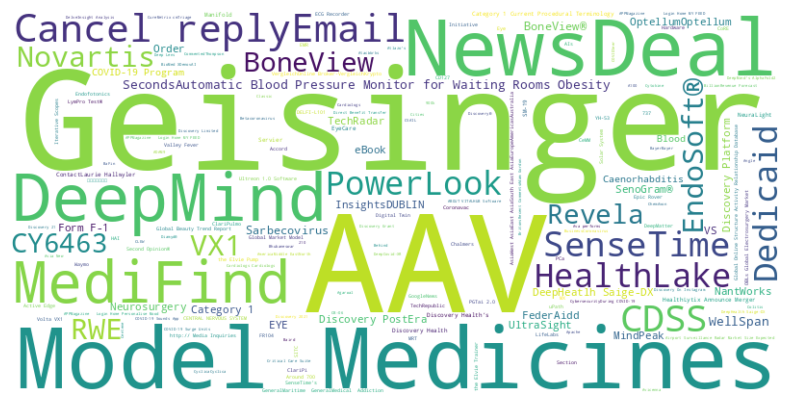

In [69]:
healthcare_org = healthcare_entities[(healthcare_entities.Labels == 'PRODUCT') & (healthcare_entities.Sentiment == 'Positive')].groupby('Entities').count().reset_index()[['Entities', 'Labels']]

exclude = ['Artificial Intelligence', 'Web Service', 'Computer Vision', 'Data Analytics', 
                   'Social Media', 'AI', 'Intelligence AI', 'Machine Learning', 'Cyber Security',
                   'Data Science', 'Intelligence Market', 'OpenAI', 'COVID-19', 'Twitter', 'Discovery',
                'replyEmail', 'Cancel', 'Career']

sample = healthcare_org[~healthcare_org['Entities'].isin(exclude)]

word_counts = dict(zip(sample['Entities'].tolist(), sample['Labels'].tolist()))
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Publishing

In [70]:
entity_analysis.head(2)

,Entities,Labels,Score,Sentiment,date,article_sent,Industry
0,ETC,ORG,0.0,Neutral,2021-03-18,positive,Automotive
1,Beijing,GPE,0.0,Neutral,2021-03-18,positive,Automotive


In [74]:
publishing = entity_analysis[entity_analysis.Industry == 'Publishing']

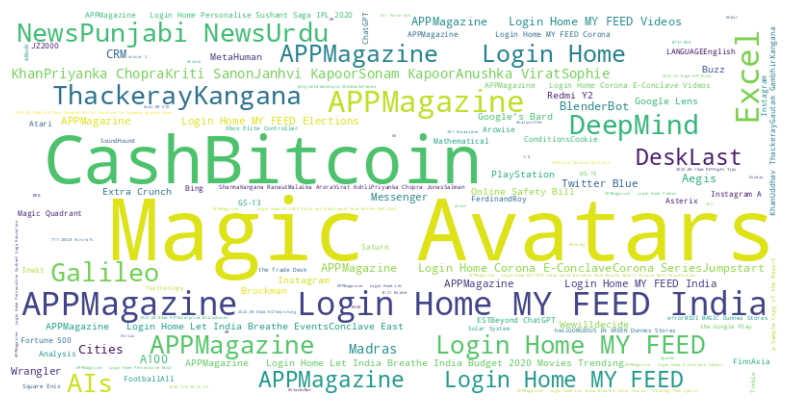

In [75]:
publishing = publishing[(publishing.Labels == 'PRODUCT') & (publishing.Sentiment == 'Positive')].groupby('Entities').count().reset_index()[['Entities', 'Labels']]

exclude = ['Artificial Intelligence', 'Web Service', 'Computer Vision', 'Data Analytics', 
                   'Social Media', 'AI', 'Intelligence AI', 'Machine Learning', 'Cyber Security',
                   'Data Science', 'Intelligence Market', 'OpenAI', 'COVID-19', 'Twitter', 'Discovery',
                'replyEmail', 'Cancel', 'Career', 'Login', 'Home']

sample = publishing[~publishing['Entities'].isin(exclude)]

word_counts = dict(zip(sample['Entities'].tolist(), sample['Labels'].tolist()))
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Identify new technologies and AI solutions

In [39]:
technologies = ['Google Bard', 'ChatGPT', 'GPT-3', 'GPT-4', 'IoT', 
                'Quantum Computing', 'GAN', 'Conversational AI', 'OpenAI',
               'AutoML', 'Edge AI', 'Deepbrain AI', 'DeepMind', ' LLM ', ' MLOps ',
               'Stability AI', 'Credo AI', 'GNN', 'AI CRM',
               'Generative AI', 'LaMDA']

In [40]:
df.head(2)

,date,main_text,cleaned_tokens,ktrain_topic,vader_score2,vader_sentiment2,NER_sent,bert_sentiment,website,Industry,yr_month
0,2021-03-18,"Photo taken on July 1, 2019, shows a sign for ...","[Photo, taken, July, show, sign, electronic, t...",5,0.9946,Positive,Ent...,positive,en.people.cn,Automotive,2021-03
1,2020-02-27,Children With Autism Saw Their Learning and So...,"[Children, With, Autism, Saw, Their, Learning,...",5,0.9981,Positive,E...,positive,newsparliament.com,Others,2020-02


### Introduction Date

In [43]:
tech_intro = []
mentioned_cnt = []
for tech in technologies:
    
    mentioned_df = df[df['main_text'].str.contains(tech, case = True)].sort_values(by = 'date')
    mentioned = mentioned_df.shape[0]
    first_appearence = mentioned_df['date'].values[0]
    tech_intro.append(first_appearence)
    mentioned_cnt.append(mentioned)

In [44]:
tech_df = pd.DataFrame({"Technology": technologies, "Date": tech_intro, "Mentioned": mentioned_cnt}).sort_values(by = 'Date')
tech_df

,Technology,Date,Mentioned
4,IoT,2020-01-01,5773
12,DeepMind,2020-01-01,1716
6,GAN,2020-01-02,669
7,Conversational AI,2020-01-02,1502
10,Edge AI,2020-01-03,1936
9,AutoML,2020-01-03,332
5,Quantum Computing,2020-01-06,366
8,OpenAI,2020-01-09,15845
17,GNN,2020-01-29,25
13,LLM,2020-02-04,454


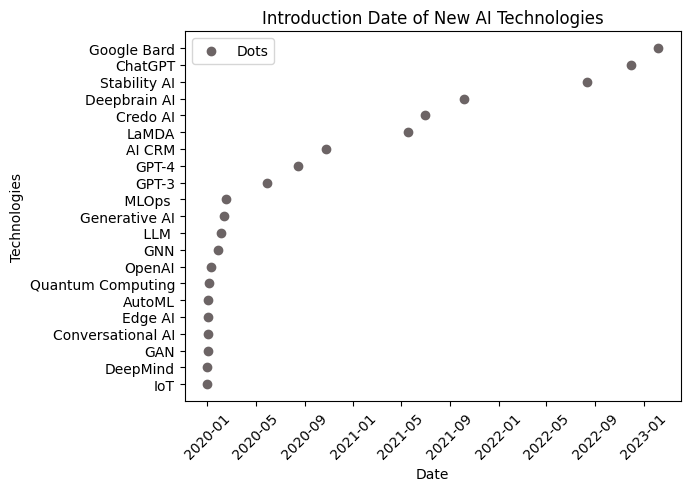

In [45]:
# Plot the dots
# Create the figure and axes
fig, ax = plt.subplots()
ax.scatter(tech_df['Date'], tech_df['Technology'], color='#6c6465', label='Dots')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Technologies')
ax.set_title('Introduction Date of New AI Technologies')

# Add a legend
ax.legend()
plt.xticks(rotation = 45)
# Show the plot
plt.show()

### Mentioned Counts

In [89]:
mention = ['IoT', 'GPT-4', 'ChatGPT', 'Edge AI', 'Generative AI']

tech_analysis = df.copy()
for tech in mention:
    tech_analysis[tech] = df['main_text'].str.contains(tech, case = True)
    
tech_grouped = tech_analysis[mention]
tech_grouped['date'] = tech_analysis['yr_month']
tech_grouped = tech_grouped.groupby('date').sum()
tech_grouped.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,IoT,GPT-4,ChatGPT,Edge AI,Generative AI
date,,,,,
2020-01,146,0,0,35,0
2020-02,146,0,0,31,1
2020-03,177,0,0,31,0
2020-04,130,0,0,34,0
2020-05,155,0,0,32,0


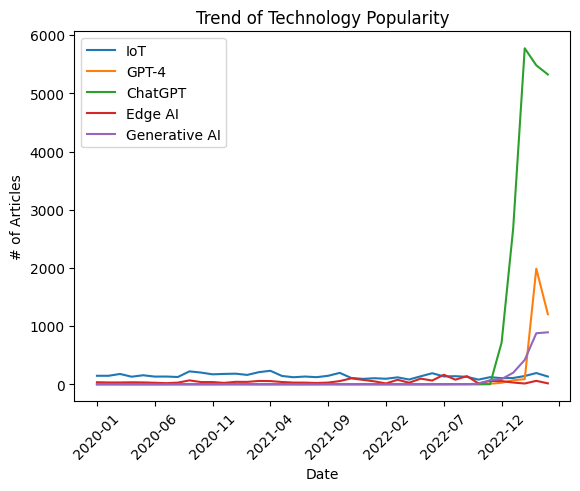

In [93]:
tech_grouped.plot()
plt.xticks(rotation = 45)
plt.ylabel("# of Articles")
plt.xlabel("Date")
plt.title("Trend of Technology Popularity")
plt.show()

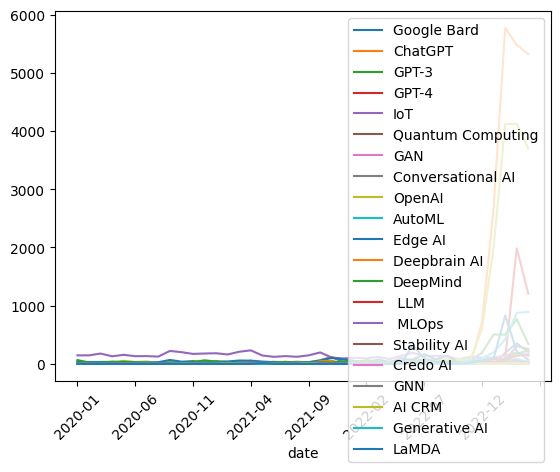

In [80]:
tech_grouped.plot()
plt.xticks(rotation = 45)
plt.show()

## Text Summarization

In [7]:
logits = pd.read_csv('roberta_logits.csv')
logits.head()

,Unnamed: 0,url,Sentiment_RoBERTa,Sentiment_RoBERTa_prob
0,0,http://en.people.cn/n3/2021/0318/c90000-983012...,positive,0.999576
1,1,http://newsparliament.com/2020/02/27/children-...,positive,0.998865
2,2,http://www.dataweek.co.za/12835r,neutral,0.997008
3,3,http://www.homeoffice.consumerelectronicsnet.c...,positive,0.998656
4,4,http://www.itbusinessnet.com/2020/10/olympus-t...,neutral,0.999327


In [8]:
%%time
with open("data_full.pkl", 'rb') as f:
    new = pickle.load(f)

CPU times: user 1min 36s, sys: 6.67 s, total: 1min 43s
Wall time: 1min 43s


In [9]:
logits.shape

(151026, 4)

In [10]:
new.head()

,url,date,title,text,main_text,relevant,Tokens,cleaned_tokens,ktrain_topic,vader_score,vader_sentiment,svm_sentiment,vader_score2,textblob_sent,vader_sentiment2,NER,NER_sent,bert_sentiment
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,"Photo taken on July 1, 2019, shows a sign for ...",1,"[Photo, taken, on, July, 1, ,, 2019, ,, shows,...","[Photo, taken, July, show, sign, electronic, t...",5,0.9954,Positive,1,0.9946,Positive,Positive,Ent...,Ent...,positive
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,Children With Autism Saw Their Learning and So...,1,"[Children, With, Autism, Saw, Their, Learning,...","[Children, With, Autism, Saw, Their, Learning,...",5,0.9980,Positive,0,0.9981,Positive,Positive,E...,E...,positive
2,http://www.dataweek.co.za/12835r,2021-03-26,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...","Forget ML, AI and Industry 4.0 – obsolescence ...",1,"[Forget, ML, ,, AI, and, Industry, 4.0, –, obs...","[Forget, ML, AI, Industry, obsolescence, focus...",5,0.9967,Positive,0,0.9975,Positive,Positive,Entities Labels 0 Forget...,Entities Labels Score Sentiment...,neutral
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,Strategy Analytics: 71% of Smartphones Sold Gl...,1,"[Strategy, Analytics, :, 71, %, of, Smartphone...","[Strategy, Analytics, Smartphones, Sold, Globa...",0,0.9988,Positive,1,0.9988,Positive,Positive,E...,E...,positive
4,http://www.itbusinessnet.com/2020/10/olympus-t...,2020-10-20,Olympus to Support Endoscopic AI Diagnosis Edu...,\n\nOlympus to Support Endoscopic AI Diagnosis...,Olympus to Support Endoscopic AI Diagnosis Edu...,1,"[Olympus, to, Support, Endoscopic, AI, Diagnos...","[Olympus, Support, Endoscopic, AI, Diagnosis, ...",7,0.9923,Positive,0,0.9943,Positive,Positive,E...,E...,neutral


In [11]:
new.shape

(127739, 18)

In [12]:
url = new[['url']].copy()
merged = url.merge(logits, on = 'url', how = 'left')

In [21]:
merged.shape

(127739, 4)

In [22]:
merged.head()

,url,Unnamed: 0,Sentiment_RoBERTa,Sentiment_RoBERTa_prob
0,http://en.people.cn/n3/2021/0318/c90000-983012...,0.0,positive,0.999576
1,http://newsparliament.com/2020/02/27/children-...,1.0,positive,0.998865
2,http://www.dataweek.co.za/12835r,2.0,neutral,0.997008
3,http://www.homeoffice.consumerelectronicsnet.c...,3.0,positive,0.998656
4,http://www.itbusinessnet.com/2020/10/olympus-t...,4.0,neutral,0.999327


In [23]:
df['roberta_probs'] = merged['Sentiment_RoBERTa_prob']

In [27]:
df[df['Industry'] == 'Healthcare&Biotech'].sort_values('roberta_probs', ascending = False).head()

,date,main_text,cleaned_tokens,ktrain_topic,vader_score2,vader_sentiment2,NER_sent,bert_sentiment,website,Industry,yr_month,roberta_probs
10098,2023-03-29,Global Artificial Intelligence in Healthcare M...,"[Global, Artificial, Intelligence, Healthcare,...",2,0.9996,Positive,E...,positive,www.globenewswire.com,Healthcare&Biotech,2023-03,0.999892
84463,2021-02-01,"Starting yesterday, the city of Busan will coo...","[Starting, yesterday, city, Busan, cooperate, ...",7,0.9423,Positive,Entities Labels Score Sentiment 0 ...,neutral,www.hapskorea.com,Healthcare&Biotech,2021-02,0.999891
3244,2022-04-09,Could AI replace the RAT? COVID patients are c...,"[Could, AI, replace, RAT, COVID, patient, coug...",None,0.0000,Neutral,Entities Labels Score Sentiment 0 AI ...,neutral,7news.com.au,Healthcare&Biotech,2022-04,0.999888
125931,2022-09-07,Molecular Stethoscope's cf-mRNA liquid biopsy ...,"[Molecular, Stethoscope, liquid, biopsy, machi...",7,0.0000,Neutral,Entities Labels Score Sent...,neutral,www.wsaz.com,Healthcare&Biotech,2022-09,0.999888
6920,2022-09-07,Molecular Stethoscope's cf-mRNA liquid biopsy ...,"[Molecular, Stethoscope, liquid, biopsy, machi...",7,0.0000,Neutral,Entities Labels Score Sent...,neutral,www.kwqc.com,Healthcare&Biotech,2022-09,0.999888


In [30]:
healthcare_text = df[df['Industry'] == 'Healthcare&Biotech'].sort_values('roberta_probs', ascending = False)['main_text'].values[0]